# Semantyka i wektoryzacja: podstawy

**Autorzy:** S. Mandes, A. Karlińska

Zanim zaczniemy proszę doinstalować bardziej rozbudowany model języka angielskiego:

en_core_web_md

python -m spacy download en_core_web_md

albo / i 

python -m spacy download en_core_web_lg

https://spacy.io/models/en



-----
Def:

Word2vec is a group of related models that are used to produce **word embeddings**. 

These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. 

Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located close to one another in the space.

Źródło: https://en.wikipedia.org/wiki/Word2vec

Od tego tekstu się zaczęło: Mikolov et al (2013)
https://arxiv.org/pdf/1301.3781.pdf


Poniżej opieram się na:

https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469

i wersja zaktualizowana i rozbudowana

https://www.kaggle.com/john77eipe/understanding-word-vectors

-----



Zacznijmy od wyjaśnienia idei "umieszczenia" słów w przestrzeni (w wymiarach), opisywania ich i określania relacji za pomocą wektorów.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
# niezbędne jest zainstalowanie seaborn

df = pd.DataFrame({
'rodzaj': ['kot','pies','ryba','krokodyl','delfin', 'słoń', 'panda', 'koń', 'kurczak', 'mucha'],
'fajność': [95, 95, 10, 20, 80, 75, 95, 53, 30, 5],
'wielkość': [15, 25, 5, 30, 35, 95, 30, 50, 5, 2]
})
# df.index = pd.RangeIndex(start=1, stop=11, step=1)
df

,rodzaj,fajność,wielkość
0,kot,95,15
1,pies,95,25
2,ryba,10,5
3,krokodyl,20,30
4,delfin,80,35
5,słoń,75,95
6,panda,95,30
7,koń,53,50
8,kurczak,30,5
9,mucha,5,2


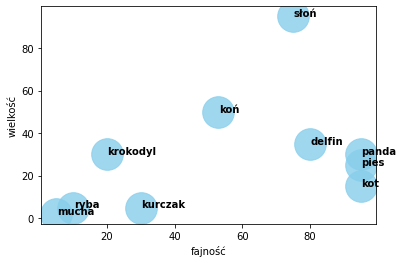

In [28]:
p=sns.regplot(data=df, x="fajność", y="wielkość", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':1000})
 

for line in range(0,df.shape[0]):
     p.text(df.fajność[line]+0.2, df.wielkość[line], df.rodzaj[line], horizontalalignment='left', size='medium', color='black', weight='semibold')



Na wykresie widać, że koniowi najbliżej jest (pod względem fajności/wielkości) do delfina. Ale jaka dokładnie jest ta odległość? I jak daleko jest od konia do krokodyla?

Można to zmierzyć za pomocą "euklidesowej odległości".

https://pl.wikipedia.org/wiki/Przestrzeń_euklidesowa

In [29]:
import math
def distance2d(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

Koń (95.0	15.0), delfin (80.0	35.0), krokodyl (20.0	30.0)

In [30]:
distance2d (53, 50, 80, 35) # koń a delfin

30.886890422961002

In [31]:
distance2d (53, 50, 20, 30) # koń a krokodyl

38.58756276314948

**Modelowanie ma kilka interesujących właściwości.**

1. Możesz wybrać dowolny punkt w przestrzeni, a następnie znaleźć zwierzę znajdujące się najbliżej tego punktu.

2. Możesz również odpowiedzieć na pytanie: co jest w połowie drogi między kurczakiem a słoniem? Wystarczy narysować linię od "słonia" do "kurczaka", zaznaczyć środek i znaleźć najbliższe zwierzę.

3. Możesz też zapytać: czy można znaleźć różnicę analogiczną do różnicy między muchą a kotem? 
 Mucha od kota różni się o 90 jednostek fajności i 13 jednostek wielkości. Pytanie: jakie dwa inne zwierzęta różnią się od siebie w taki sam lub podobny sposób? 

Sekwencja liczb używana do identyfikacji punktu nazywana jest **wektorem**, a rodzaj matematyki, którą dotychczas stosowaliśmy, nazywany jest **algebrą liniową**. 

Zbiór wektorów, które są częścią tego samego zbioru danych, jest nazywany **przestrzenią wektorową**.

W powyższym przykładzie mamy tylko dwa wymiary i nie ma on nic wspólnego z językiem (ani fajnością zwierząt). W rzeczywistej analizie wymiarów jest więcej. Najczęściej 100 albo 300.

Jest jednak jeden przykład 3-wymiarowy, na którym możemy prowadzić realistyczną analizę.

## Wektory kolorów

https://pl.wikipedia.org/wiki/RGB

In [7]:
import IPython
url = "https://upload.wikimedia.org/wikipedia/commons/0/0a/12-bit_RGB_Cube.gif"
iframe = '<iframe src=' + url + ' width=500 height=300></iframe>'
IPython.display.HTML(iframe)

In [2]:
import json

In [3]:
f = open(r'C:\py\textmining\zajęcia 6\dane\colors.json') 
colors = json.load(f) 
f.close() 

Jakie mamy kolory?

In [4]:
colors['olive']

[110, 117, 14]

In [20]:
colors['red']

[229, 0, 0]

In [21]:
colors['cement']

[165, 163, 145]

In [42]:
def get_key(val): 
    for key, value in colors.items(): 
         if val == value: 
             return key 
    return "nie ma takiego klucza"

In [43]:
get_key([165, 163, 145])

'cement'

In [41]:
len(colors)

949

### Funkcje do liczenia relacji między wektorami



In [12]:
import math
def distance(coord1, coord2):
    return math.sqrt(sum([(i - j)**2 for i, j in zip(coord1, coord2)]))

distance([10, 1], [5, 2])

5.0990195135927845

In [6]:
distance([10, 1, 4], [5, 2, 5])

5.196152422706632

In [13]:
def subtractv(coord1, coord2):
    return [c1 - c2 for c1, c2 in zip(coord1, coord2)]

subtractv([10, 1], [5, 2])

[5, -1]

In [14]:
def addv(coord1, coord2):
    return [c1 + c2 for c1, c2 in zip(coord1, coord2)]

addv([10, 1], [5, 2])

[15, 3]

In [15]:
def meanv(coords):
    sumv = [0] * len(coords[0])
    for item in coords:
        for i in range(len(item)):
            sumv[i] += item[i]
    mean = [0] * len(sumv)
    for i in range(len(sumv)):
        mean[i] = float(sumv[i]) / len(coords)
    return mean

meanv([[0, 1, 5], [2, 2, 6], [4, 3, 6]])

[2.0, 2.0]

In [10]:
distance(colors['red'], colors['green']) > distance(colors['red'], colors['pink'])

True

### Poszukiwanie najbliższego nazwanego koloru

Tak jak chcieliśmy znaleźć zwierzę, które najbardziej pasuje do dowolnego punktu w przestrzeni fajność/wielkość, będziemy chcieli znaleźć nazwę koloru najbliższą do dowolnego punktu w przestrzeni RGB. 

Najłatwiejszym sposobem na wskazanie elementu najbliższego do dowolnego wektora jest po prostu znalezienie odległości między wektorem docelowym a każdym elementem w przestrzeni, a następnie posortowanie listy od najbliższego do najdalszego. Służy do tego funkcja `closest()`, która domyślnie zwraca listę dziesięciu elementów najbliższych do danego wektora.


In [8]:
def closest(space, coord, n=10):
    closest = []
    for key in sorted(space.keys(),
                        key=lambda x: distance(coord, space[x]))[:n]:
        closest.append(key)
    return closest

In [12]:
closest(colors, colors['perrywinkle'])

['perrywinkle',
 'lavender blue',
 'periwinkle blue',
 'periwinkle',
 'soft blue',
 'pale purple',
 'cornflower',
 'wisteria',
 'light urple',
 'carolina blue']

In [13]:
closest(colors, [148, 15, 150])

['barney purple',
 'purple',
 'warm purple',
 'barney',
 'darkish purple',
 'red violet',
 'medium purple',
 'ugly purple',
 'purply',
 'magenta']

### Mieszanie kolorów 

![kolory](https://www.faspaints.com/uploads/4/7/2/6/47269167/9487363_orig.jpg)

In [69]:
a = addv(colors['red'], colors['orange'])
a

[478, 115, 6]

In [70]:
get_key(a)

'nie ma takiego klucza'

In [71]:
closest(colors, a)

['bright orange',
 'tangerine',
 'pumpkin orange',
 'blood orange',
 'orange',
 'orangered',
 'yellowish orange',
 'orange yellow',
 'red orange',
 'mango']

In [74]:
colors['tangerine']

[255, 148, 8]

In [63]:
# Odejmowanie kolorów
closest(colors, subtractv(colors['purple'], colors['red']))

['cobalt blue',
 'royal blue',
 'darkish blue',
 'true blue',
 'royal',
 'prussian blue',
 'dark royal blue',
 'deep blue',
 'marine blue',
 'deep sea blue']

In [78]:
# średnia z białego i czarnego
closest(colors, meanv([colors['black'], colors['white']]))

['medium grey',
 'purple grey',
 'steel grey',
 'battleship grey',
 'grey purple',
 'purplish grey',
 'greyish purple',
 'steel',
 'warm grey',
 'green grey']

### Kolor powieści



In [79]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [38]:
# Bram Stoker "Dracula"
with open (r'C:\py\textmining\zajęcia 6\dane\pg345.txt') as f:
    doc = nlp(f.read())


In [ ]:
drac_colors = [colors[word.lower_] for word in doc if word.lower_ in colors]
avg_color = meanv(drac_colors)
print (avg_color)

In [81]:
closest(colors, avg_color)

['reddish grey',
 'brownish grey',
 'brownish',
 'brown grey',
 'mocha',
 'grey brown',
 'puce',
 'dull brown',
 'pinkish brown',
 'dark taupe']

#### Kolory u Prusa

In [3]:
import spacy
nlp = spacy.load('pl_spacy_model')
# nlp.max_length = 1700000

In [1]:
import json  

f = open(r'C:\py\textmining\zajęcia 6\dane\kolory_pl.json') 
kolory = json.load(f) 
f.close() 

In [4]:
with open (r"C:\py\textmining\zajęcia 6\dane\lalka_t1.txt", encoding='utf-8') as file:
    lalka_r = file.read()
doc = nlp(lalka_r)

In [7]:
lalka_kolory = [kolory[word.lemma_] for word in doc if word.lemma_ in kolory]
avg_color = meanv(lalka_kolory)
print (avg_color)

[157.64900662251657, 133.83112582781456, 99.02649006622516]


In [14]:
closest(kolory, avg_color)

['orzechowy',
 'szary',
 'stalowy',
 'sepia',
 'eozyna',
 'miedziany',
 'beżowy',
 'kakaowy',
 'spiżowy',
 'khaki']

In [15]:
len(lalka_kolory)

302

In [16]:
lalka_kolory

[[222, 213, 208],
 [0, 128, 0],
 [0, 0, 0],
 [0, 128, 0],
 [0, 0, 0],
 [0, 0, 0],
 [122, 125, 128],
 [8, 37, 103],
 [255, 215, 0],
 [0, 0, 128],
 [255, 255, 255],
 [250, 247, 229],
 [134, 100, 35],
 [219, 227, 222],
 [0, 0, 0],
 [128, 128, 128],
 [0, 128, 0],
 [0, 0, 0],
 [192, 192, 192],
 [150, 75, 0],
 [222, 213, 208],
 [0, 0, 255],
 [255, 255, 255],
 [205, 87, 0],
 [128, 128, 128],
 [255, 255, 0],
 [128, 128, 128],
 [255, 255, 255],
 [0, 0, 255],
 [255, 255, 0],
 [255, 255, 255],
 [0, 0, 255],
 [128, 128, 128],
 [8, 37, 103],
 [255, 56, 0],
 [255, 215, 0],
 [0, 128, 0],
 [128, 128, 128],
 [207, 41, 41],
 [255, 255, 255],
 [222, 213, 208],
 [219, 227, 222],
 [250, 250, 231],
 [83, 47, 40],
 [0, 128, 128],
 [255, 215, 0],
 [8, 37, 103],
 [0, 0, 0],
 [255, 255, 255],
 [205, 127, 50],
 [242, 59, 28],
 [255, 255, 255],
 [219, 227, 222],
 [128, 128, 128],
 [0, 0, 0],
 [128, 128, 128],
 [128, 128, 128],
 [192, 192, 192],
 [0, 0, 0],
 [128, 128, 128],
 [0, 0, 255],
 [128, 128, 128],
 [255, 

In [55]:
kol = []
for word in doc:
    if word.lemma_ in kolory:
        kol.append(word.lemma_)

In [56]:
kol

['siwy',
 'zielony',
 'czarny',
 'zielony',
 'czarny',
 'czarny',
 'stalowy',
 'szafirowy',
 'złoty',
 'granatowy',
 'biały',
 'porcelanowy',
 'tabaczkowy',
 'popielaty',
 'czarny',
 'szary',
 'zielony',
 'czarny',
 'srebrny',
 'brązowy',
 'siwy',
 'niebieski',
 'biały',
 'rudy',
 'szary',
 'żółty',
 'szary',
 'biały',
 'niebieski',
 'żółty',
 'biały',
 'niebieski',
 'szary',
 'szafirowy',
 'pąsowy',
 'złoty',
 'zielony',
 'szary',
 'krwisty',
 'biały',
 'siwy',
 'popielaty',
 'perłowy',
 'palisander',
 'morski',
 'złoty',
 'szafirowy',
 'czarny',
 'biały',
 'spiżowy',
 'pomarańczowy',
 'biały',
 'popielaty',
 'szary',
 'czarny',
 'szary',
 'szary',
 'srebrny',
 'czarny',
 'szary',
 'niebieski',
 'szary',
 'biały',
 'szary',
 'szary',
 'czarny',
 'popielaty',
 'czarny',
 'szary',
 'siwy',
 'czerwony',
 'biały',
 'czerwony',
 'czerwony',
 'srebrny',
 'zielony',
 'czarny',
 'biały',
 'czarny',
 'biały',
 'czerwony',
 'stalowy',
 'stalowy',
 'szary',
 'zielony',
 'biały',
 'brązowy',
 'ol

Przykład jest interesujący z uwagi na prosty fakt: kolory, które uważamy za podobne, są "bliżej" do siebie w przestrzeni wektorowej RGB.

Ale co z innymi słowami? Czy możliwe jest stworzenie przestrzeni wektorowej dla wszystkich słów danego języka?

Aby odpowiedzieć na to pytanie, musimy trochę się cofnąć i zastanowić się, czym jest znaczenie. W przypadku kolorów to było jasne: bliskość w spektrum widma. 

Sprawa jest skomplikowana. Jedną z teorii popularnych wśród lingwistów, informatyków i innych osób tworzących wyszukiwarki jest [Hipoteza Dystrybucyjna](https://en.wikipedia.org/wiki/Distributional_semantics), która  stwierdza:

**"a word is characterized by the company it keeps"**

Przedmioty lingwistyczne o podobnych rozkładach mają podobne znaczenia.

"Podobne dystrybucje" to podobne konteksty. Weźmy na przykład następujące zdania:

- It was really cold yesterday.
- It will be really warm today, though.
- It'll be really hot tomorrow!
- Will it be really cool Tuesday?

Zgodnie z Hipotezą Dystrybucyjną słowa "cold", "warm", "hot" i "cool" muszą być w jakiś sposób powiązane (tzn. być mieć podobne znaczenie/sens), ponieważ występują w podobnym kontekście, tzn. między słowem "really" a słowem oznaczającym konkretny dzień. (Podobnie słowa wczoraj, dziś, jutro i wtorek muszą być ze sobą powiązane, ponieważ występują w kontekście słowa oznaczającego temperaturę).

Innymi słowy, zgodnie z Hipotezą Dystrybucyjną, znaczenie słowa jest tylko dużą listą wszystkich kontekstów, w których występuje. Dwa słowa mają podobne znaczenie, jeśli mają wspólne konteksty.

### Wektoryzacja słów poprzez zliczanie kontekstu

In [31]:
print('It was the best of times, it was the worst of times.')

It was the best of times, it was the worst worst of times.


In [32]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
' ': ['it', 'was', 'the', 'best', 'of', 'times', 'worst'],
'START___was': [1, 0, 0, 0, 0, 0, 0],
'it___the': [0, 2, 0, 0, 0, 0, 0],
'was___best': [0, 0, 1, 0, 0, 0, 0],
'the___of': [0, 0, 0, 1, 0, 0, 1],
'best___times': [0, 0, 0, 0, 1, 0, 0],
'of___it': [0, 0, 0, 0, 0, 1, 0],
'times___was': [1, 0, 0, 0, 0, 0, 0],
'was___worst': [0, 0, 1, 0, 0, 0, 0],
'worst___times': [0, 0, 0, 0, 1, 0, 0],
'of___END': [0, 0, 0, 0, 0, 1, 0]
})
# trzeba doinstalować: conda install -c intel jinja2
df.style.hide_index()

,START___was,it___the,was___best,the___of,best___times,of___it,times___was,was___worst,worst___times,of___END
it,1,0,0,0,0,0,1,0,0,0
was,0,2,0,0,0,0,0,0,0,0
the,0,0,1,0,0,0,0,1,0,0
best,0,0,0,1,0,0,0,0,0,0
of,0,0,0,0,1,0,0,0,1,0
times,0,0,0,0,0,1,0,0,0,1
worst,0,0,0,1,0,0,0,0,0,0


Wartości w każdej komórce odpowiadają temu, ile razy słowo występuje w danym kontekście. Liczby w wierszach stanowią wektor tego słowa, tzn. wektor dla słowa **of** jest

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

Ponieważ istnieje dziesięć możliwych kontekstów, jest to przestrzeń dziesięciowymiarowa! 

Choć może wydawać się to dziwne, na wektorach z dziesięcioma wymiarami można zrobić arytmetykę wektorową równie łatwo, co na wektorach z dwoma lub trzema wymiarami. Można użyć tej samej formuły odległości, którą zdefiniowaliśmy wcześniej, aby uzyskać użyteczne informacje o tym, które wektory w tej przestrzeni są do siebie podobne. W szczególności wektory dla "najlepszego" i "najgorszego" są w rzeczywistości takie same (odległość równa zeru), ponieważ występują tylko w jednym i tym samym kontekście (the___ of):

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

Oczywiście w korpusie o rozsądnej wielkości będzie wiele tysięcy, jeśli nie wiele milionów możliwych kontekstów. To wystarczająco trudne pracować z przestrzenią wektorową dziesięciu wymiarów, nie mówiąc już o przestrzeni wektorowej miliona wymiarów! Okazuje się jednak, że wiele z tych wymiarów staje się zbędnych i można je albo wyeliminować, albo połączyć z innymi wymiarami bez znaczącego wpływu na siłę prognostyczną powstałych wektorów. Proces pozbywania się zbędnych wymiarów w przestrzeni wektorowej nazywany jest redukcją wymiarowości, a większość implementacji słownych wektorów zliczających wykorzystuje redukcję wymiarowości, tak aby wynikowa przestrzeń wektorowa miała rozsądną liczbę wymiarów (powiedzmy 100-300, w zależności od korpusu i zastosowania).

Sama odpowiedź na pytanie, jak zidentyfikować "kontekst" jest bardzo trudna. 

W zależności od implementacji tej procedury, możesz jednak uwzględnić kontekst z większym "oknem" (np. dwa słowa przed i po) lub nieciągłym oknem (pominąć słowo przed i po danym słowie). Możesz wykluczyć pewne słowa "funkcyjne", takie jak "the" i "of", przy określaniu kontekstu słowa lub też możesz zlematyzować słowa przed rozpoczęciem analizy (w efekcie dwa wystąpienia z różnymi "formami" tego samego słowa liczą się jako ten sam kontekst). To wszystko są pytania otwarte na badania i dyskusje, a w różnych implementacjach procedur tworzenia wektorów słów liczonych podejmuje się różne decyzje w tej kwestii.

### Wektoryzacja w spaCy

In [1]:
import spacy
nlp = spacy.load('en_core_web_md')

In [2]:
with open (r'C:\py\textmining\zajęcia 6\dane\pg345.txt') as f:
    doc = nlp(f.read())

In [3]:
# lista wszystkich słów z tekstu 
tokens = list(set([w.text for w in doc if w.is_alpha]))
    

In [4]:
nlp('cheese').vector

array([-5.5252e-01,  1.8894e-01,  6.8737e-01, -1.9789e-01,  7.0575e-02,
        1.0075e+00,  5.1789e-02, -1.5603e-01,  3.1941e-01,  1.1702e+00,
       -4.7248e-01,  4.2867e-01, -4.2025e-01,  2.4803e-01,  6.8194e-01,
       -6.7488e-01,  9.2401e-02,  1.3089e+00, -3.6278e-02,  2.0098e-01,
        7.6005e-01, -6.6718e-02, -7.7794e-02,  2.3844e-01, -2.4351e-01,
       -5.4164e-01, -3.3540e-01,  2.9805e-01,  3.5269e-01, -8.0594e-01,
       -4.3611e-01,  6.1535e-01,  3.4212e-01, -3.3603e-01,  3.3282e-01,
        3.8065e-01,  5.7427e-02,  9.9918e-02,  1.2525e-01,  1.1039e+00,
        3.6678e-02,  3.0490e-01, -1.4942e-01,  3.2912e-01,  2.3300e-01,
        4.3395e-01,  1.5666e-01,  2.2778e-01, -2.5830e-02,  2.4334e-01,
       -5.8136e-02, -1.3486e-01,  2.4521e-01, -3.3459e-01,  4.2839e-01,
       -4.8181e-01,  1.3403e-01,  2.6049e-01,  8.9933e-02, -9.3770e-02,
        3.7672e-01, -2.9558e-02,  4.3841e-01,  6.1212e-01, -2.5720e-01,
       -7.8506e-01,  2.3880e-01,  1.3399e-01, -7.9315e-02,  7.05

In [5]:
# funkcja skracająca
def vec(s):
    return nlp(s).vector


In [6]:
vec('cheese')

array([-5.5252e-01,  1.8894e-01,  6.8737e-01, -1.9789e-01,  7.0575e-02,
        1.0075e+00,  5.1789e-02, -1.5603e-01,  3.1941e-01,  1.1702e+00,
       -4.7248e-01,  4.2867e-01, -4.2025e-01,  2.4803e-01,  6.8194e-01,
       -6.7488e-01,  9.2401e-02,  1.3089e+00, -3.6278e-02,  2.0098e-01,
        7.6005e-01, -6.6718e-02, -7.7794e-02,  2.3844e-01, -2.4351e-01,
       -5.4164e-01, -3.3540e-01,  2.9805e-01,  3.5269e-01, -8.0594e-01,
       -4.3611e-01,  6.1535e-01,  3.4212e-01, -3.3603e-01,  3.3282e-01,
        3.8065e-01,  5.7427e-02,  9.9918e-02,  1.2525e-01,  1.1039e+00,
        3.6678e-02,  3.0490e-01, -1.4942e-01,  3.2912e-01,  2.3300e-01,
        4.3395e-01,  1.5666e-01,  2.2778e-01, -2.5830e-02,  2.4334e-01,
       -5.8136e-02, -1.3486e-01,  2.4521e-01, -3.3459e-01,  4.2839e-01,
       -4.8181e-01,  1.3403e-01,  2.6049e-01,  8.9933e-02, -9.3770e-02,
        3.7672e-01, -2.9558e-02,  4.3841e-01,  6.1212e-01, -2.5720e-01,
       -7.8506e-01,  2.3880e-01,  1.3399e-01, -7.9315e-02,  7.05

### Szukanie podobieństw w n-wymiarowej przestrzeni: podobieństwo kosinusowe (cosine similarity)

[Stopień podobieństwa dwóch wyrazów](http://dsmodels.nlp.ipipan.waw.pl/sim1.html)

In [7]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cosine(v1, v2):
    if norm(v1) > 0 and norm(v2) > 0:
        return dot(v1, v2) / (norm(v1) * norm(v2))
    else:
        return 0.0

Poniższa komórka pokazuje, że cosinusowe podobieństwo między `dog` i `puppy` jest większe niż podobieństwo między `trousers` i `octopus`, dowodząc tym samym, że wektory działają tak, jak tego oczekujemy:

In [8]:
cosine(vec('dog'), vec('puppy')) > cosine(vec('trousers'), vec('octopus'))

True

Poniższej zdefiniowana została funkcja, która iteruje przez listę tokenów i zwraca tokeny, których wektor jest najbardziej podobny do danego wektora.

In [9]:
def spacy_closest(token_list, vec_to_check, n=10):
    return sorted(token_list,
                  key=lambda x: cosine(vec_to_check, vec(x)),
                  reverse=True)[:n]

Na przykład, jakie słowa są nabliższe słowu "basketball" w powieści *Dracula*:

In [10]:
spacy_closest(tokens, vec("basketball"))

['tennis',
 'coach',
 'game',
 'teams',
 'junior',
 'Junior',
 'Team',
 'school',
 'boys',
 'puma']

### Algebra liniowa w powieści *Dracula*

In [ ]:
# co jest pomiędzy dniem a nocą
spacy_closest(tokens, meanv([vec("day"), vec("night")]))

In [17]:
# najbliższe słowo do 'wine'
spacy_closest(tokens, vec("wine"))

['wine',
 'sparkling',
 'beer',
 'bottle',
 'corked',
 'jug',
 'drink',
 'Drink',
 'fruit',
 'bottles']

In [18]:
#  a co zostanie, jak od wina odejmiemy alkohol?
spacy_closest(tokens, subtractv(vec("wine"), vec("alcohol")))

['wine',
 'sparkling',
 'graceful',
 'exquisite',
 'fabulous',
 'magnificent',
 'marvellous',
 'splendid',
 'delightful',
 'banquet']

In [ ]:
# najbliższe do wody będzie...
spacy_closest(tokens, vec("water"))

In [ ]:
# a co jeśli zmrozimy wodę
spacy_closest(tokens, addv(vec("water"), vec("frozen")))

### Podobieństwo zdań.

Aby uzyskać wektor dla zdania, po prostu uśredniamy jego wektory składowe:

In [19]:
def sentvec(s):
    sent = nlp(s)
    return meanv([w.vector for w in sent])

Znajdźmy zdanie w naszym pliku tekstowym, które jest najbliższe w "znaczeniu" dowolnemu zdaniu wejściowemu. 

Na początek jednak musimy stworzyć listę zdań:

In [20]:
sentences = list(doc.sents)

Poniższa funkcja pobiera listę zdań i porównuje je do zdania wejściowego, sortując je według podobieństwa kosinusowego.

In [22]:
def spacy_closest_sent(space, input_str, n=10):
    input_vec = sentvec(input_str)
    return sorted(space,
                  key=lambda x: cosine(np.mean([w.vector for w in x], axis=0), input_vec),
                  reverse=True)[:n]

In [23]:
for sent in spacy_closest_sent(sentences, "My favorite food is strawberry ice cream."):
    print (sent.text)
    print ("---")

This, with some cheese
and a salad and a bottle of old Tokay, of which I had two glasses, was
my supper.
---
I had for dinner, or
rather supper, a chicken done up some way with red pepper, which was
very good but thirsty.
---
I dined on what they
called "robber steak"--bits of bacon, onion, and beef, seasoned with red
pepper, and strung on sticks and roasted over the fire, in the simple
style of the London cat's meat!
---
We get hot soup, or coffee, or tea; and
off we go.
---
" I set to and
enjoyed a hearty meal.
---
I had for breakfast more paprika, and a sort of porridge of maize flour
which they said was "mamaliga," and egg-plant stuffed with forcemeat, a
very excellent dish, which they call "impletata."
---
There was everywhere a bewildering mass of fruit blossom--apple,
plum, pear, cherry; and as we drove by I could see the green grass under
the trees spangled with the fallen petals.
---
I got a cup of tea at the AĂ«rated Bread Company
and came down to Purfleet by the next train.
